# HOUSING: PRICE PREDICTION
## Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

We see that the dataset has 1168 rows and 81 columns

## Train Dataset

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# checking the null values of the train datase
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

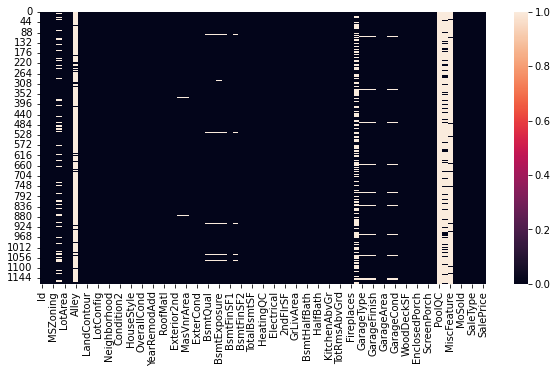

In [5]:
plt.figure(figsize=[10,5])
sns.heatmap(df_train.isnull());

#### We can clearly see that few rows has null values:

- LotFrontage has 214 null values

- Alley has 1091 null values

- BsmtQual has 30 null values

- BsmtCond has 30 null values

- BsmtExposure has 31 null values

- BsmtFinType1 has 30 null values

- BsmtFinType2 has 31 null values

- FireplaceQu has 551 null values

- GarageType has 64 null values

- GarageYrBlt has 64 null values

- GarageFinish has 64 null values

- GarageQual has 64 null values

- GarageCond has 64 null values

- PoolQC has 1161 null values

- Fence has 931 null values

- MiscFeature has 1124 null values

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Test Dataset

In [7]:
df_test = pd.read_csv('test.csv')
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

We have 292 rows and 80 columns.

In [8]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

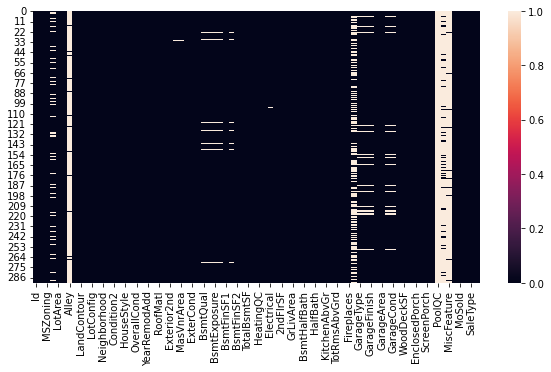

In [10]:
plt.figure(figsize=[10,5])
sns.heatmap(df_test.isnull());

##### We see null values in the test dataset aswell

LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [12]:
df_train['Source']='train'
df_test['Source']='test'
df=pd.concat([df_train,df_test],ignore_index=True)

In [13]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2007   
1         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   2007   
2         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2007   
3         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      1   2010   
4         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2009   

  SaleType  SaleCondition  SalePrice  Source  
0       WD         Normal   128000.0   train  
1       WD         Normal   268000.0   train  
2       WD         Normal   269790.0   train  
3      COD         Normal   190000.0   train  
4       WD         Normal   215000.0   train  

[5 rows x 82 columns]

We see that we have 1460 rows and 82 columns.

In [14]:
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
        
        
print('Categorical Columns \n\n',cat_col,'\n')
print('*'*75,'\n')
print('Numerical Columns \n\n',num_col)

Categorical Columns 

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Source'] 

*************************************************************************** 

Numerical Columns 

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', '

In [15]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Source             0
Length: 82, dtype: int64

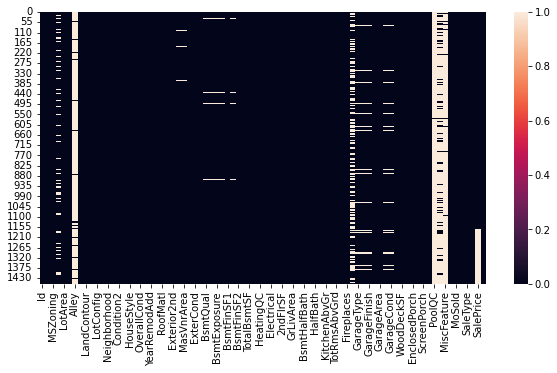

In [16]:
plt.figure(figsize=[10,5])
sns.heatmap(df.isnull());

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
fill_na = ['PoolQC','Fence','MiscFeature','GarageType', 'GarageYrBlt',
    'GarageFinish', 'GarageArea','GarageQual', 'GarageCond','FireplaceQu',
    'Electrical','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond',
    'BsmtQual', 'MasVnrType','MasVnrArea','Alley','LotFrontage']

In [19]:
for i in fill_na:
    if df.dtypes[i] == 'object':
        print(df[i].value_counts())
        df[i].fillna('NA', inplace = True)
    else:
        df[i].fillna(df[i].mean(), inplace=True)

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: Bsm

In [20]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Source             0
Length: 82, dtype: int64

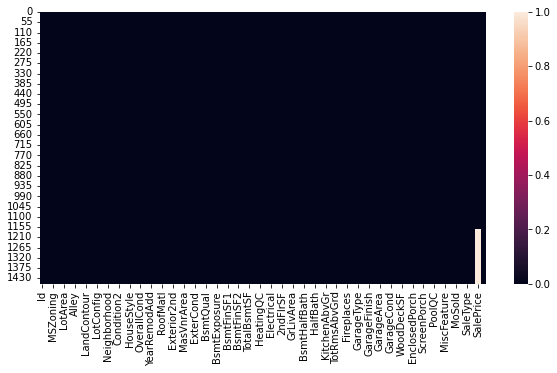

In [21]:
plt.figure(figsize=[10,5])
sns.heatmap(df.isnull());

We can see that all the missing values are removed from the dataset.

We're not removing the missing values of the column 'SalePrice' since the missing values belongs only for the test dataset.

## Data Visualization

In [22]:
print(len(cat_col))
print(len(num_col))

44
38


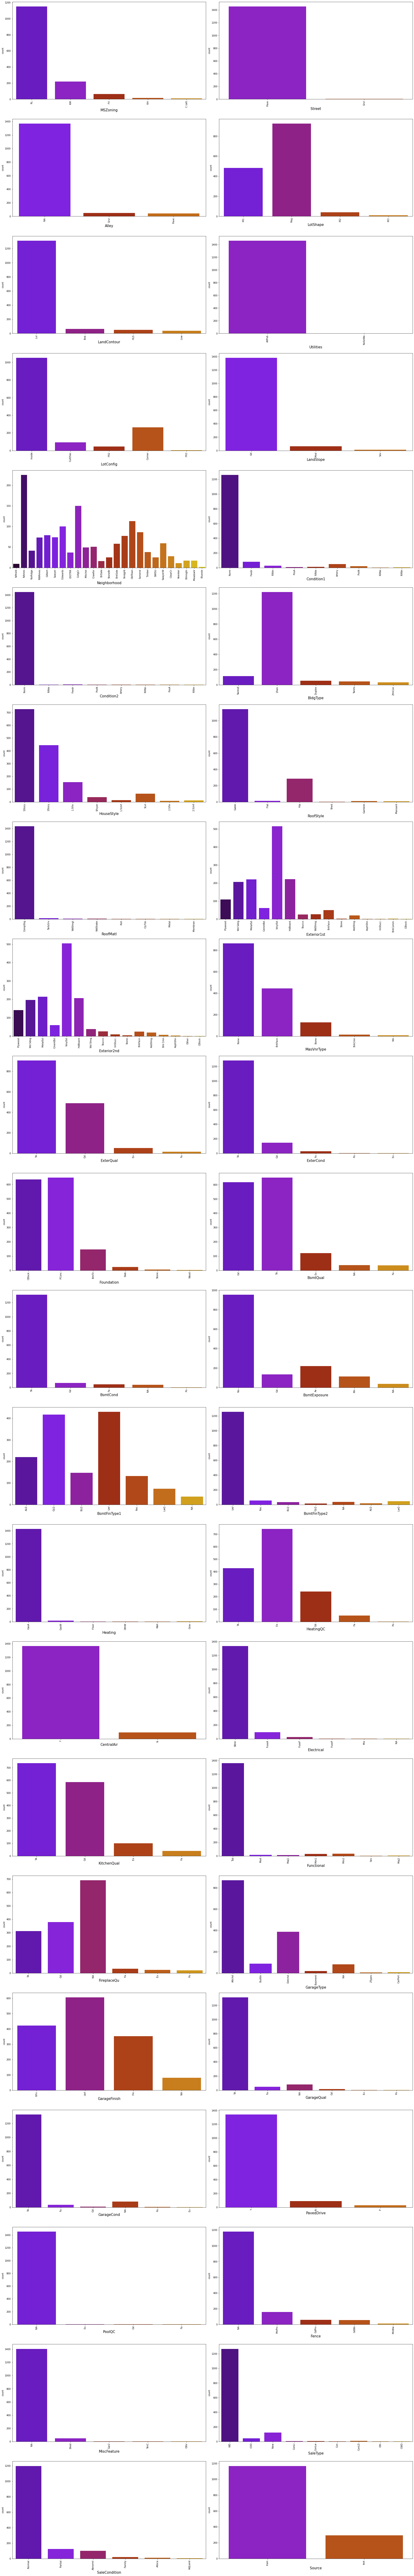

In [23]:
plt.figure(figsize=(25,155),facecolor='white')
plotnumber = 1
for i in cat_col:
    if plotnumber<=44:
        ax=plt.subplot(22,2,plotnumber)
        sns.countplot(df[i],palette = 'gnuplot')
        plt.xticks(rotation=90)
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

<Figure size 576x432 with 0 Axes>

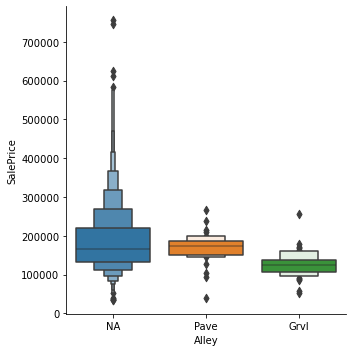

In [24]:
plt.figure(figsize=[8,6])
sns.catplot(x='Alley', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

We can observe that the effect of alley access to the properties is very less. So, it is better to remove this column as approx 94% of properties has no alley access.

In [25]:
df = df.drop(['Alley'], axis=1)

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  Utilities LotConfig  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0    AllPub    Inside  ...     NA     NA          NA       0      2   2007   
1    AllPub    Inside  ...     NA     NA          NA       0     10   2007   
2    AllPub   CulDSac  ...     NA     NA          NA       0      6   2007   
3    AllPub    Inside  ...     NA  MnPrv          NA       0      1   2010   
4    AllPub       FR2  ...     NA     NA          NA       0      6   2009   

   SaleType  SaleCondition  SalePrice  Source  
0        WD         Normal   128000.0   train  
1        WD         Normal   268000.0   train  
2        WD         Normal   269790.0   train  
3       COD         Normal   190000.0   train  
4        WD         Normal   215000.0   train  

[5 rows x 81 columns]

<Figure size 576x288 with 0 Axes>

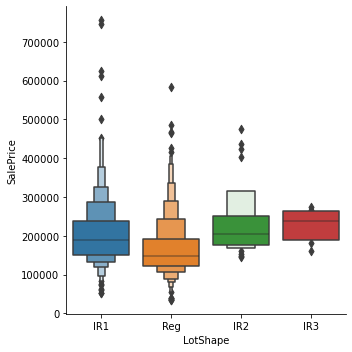

In [26]:
plt.figure(figsize=[8,4])
sns.catplot(x='LotShape', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

<Figure size 576x288 with 0 Axes>

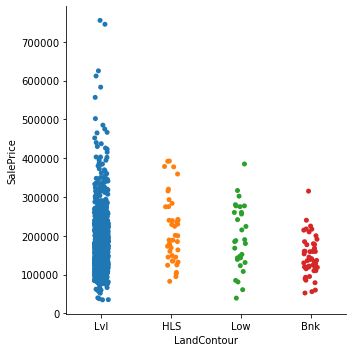

In [27]:
plt.figure(figsize=[8,4])
sns.catplot(x='LandContour', y='SalePrice', data=df.sort_values('SalePrice', ascending=False));

<Figure size 576x288 with 0 Axes>

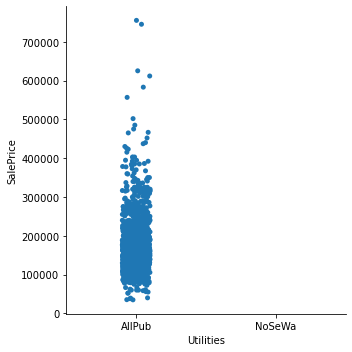

In [28]:
plt.figure(figsize=[8,4])
sns.catplot(x='Utilities', y='SalePrice', data=df.sort_values('SalePrice', ascending=False));

We can see that approx 100% properties have all public Utilities (E,G,W,& S). So, we can drop this column as this will not contribute to the dataset in the model building.

In [29]:
df = df.drop(['Utilities'], axis=1)

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  LotConfig LandSlope  ... PoolQC  Fence MiscFeature MiscVal MoSold  YrSold  \
0    Inside       Gtl  ...     NA     NA          NA       0      2    2007   
1    Inside       Mod  ...     NA     NA          NA       0     10    2007   
2   CulDSac       Gtl  ...     NA     NA          NA       0      6    2007   
3    Inside       Gtl  ...     NA  MnPrv          NA       0      1    2010   
4       FR2       Gtl  ...     NA     NA          NA       0      6    2009   

   SaleType  SaleCondition  SalePrice Source  
0        WD         Normal   128000.0  train  
1        WD         Normal   268000.0  train  
2        WD         Normal   269790.0  train  
3       COD         Normal   190000.0  train  
4        WD         Normal   215000.0  train  

[5 rows x 80 columns]

<Figure size 432x288 with 0 Axes>

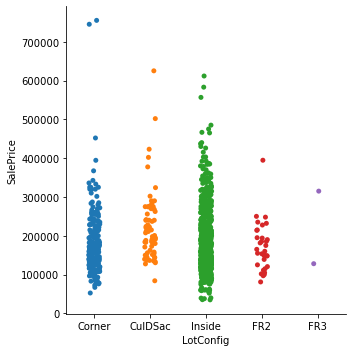

In [30]:
plt.figure(figsize=[6,4])
sns.catplot(x='LotConfig', y='SalePrice', data=df.sort_values('SalePrice', ascending=False));

<Figure size 432x288 with 0 Axes>

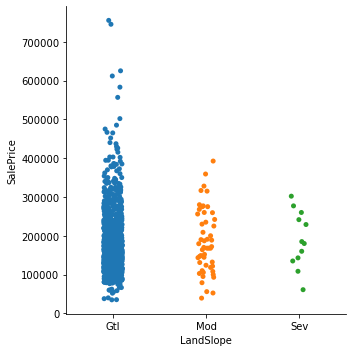

In [31]:
plt.figure(figsize=[6,4])
sns.catplot(x='LandSlope', y='SalePrice', data=df.sort_values('SalePrice', ascending=False));

The maximum gentle slope type properties having the sale price ranging between 100000 to 300000.

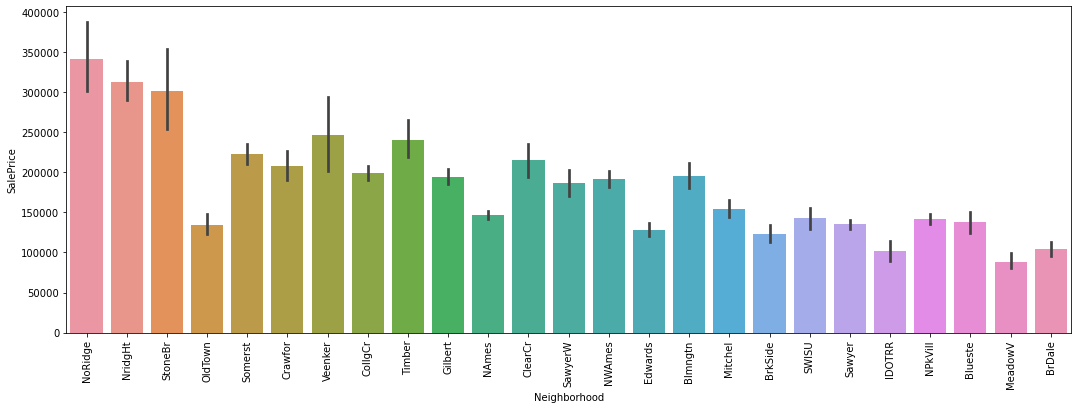

In [32]:
plt.figure(figsize=[18,6])
sns.barplot(x='Neighborhood', y='SalePrice', data= df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

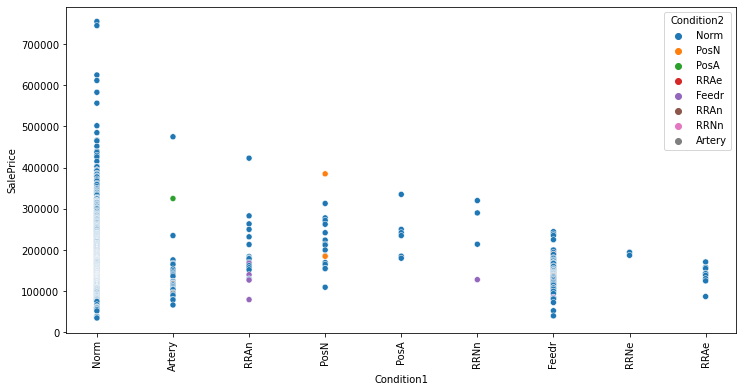

In [33]:
plt.figure(figsize=[12,6])
sns.scatterplot(x='Condition1', y='SalePrice', hue='Condition2', data=df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

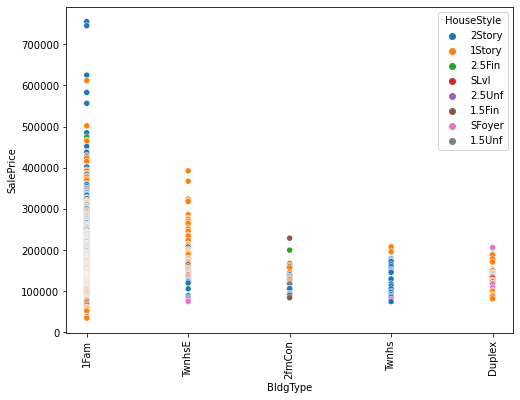

In [34]:
plt.figure(figsize=[8,6])
sns.scatterplot(x= 'BldgType', y='SalePrice', hue = 'HouseStyle', data = df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation = 90)
plt.show()

<Figure size 576x432 with 0 Axes>

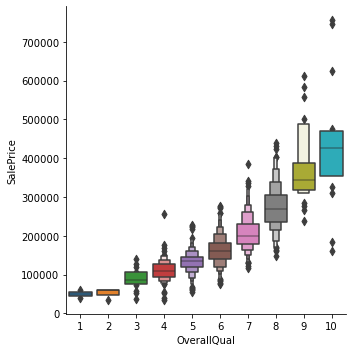

In [35]:
plt.figure(figsize=[8,6])
sns.catplot(x='OverallQual', y='SalePrice', data = df.sort_values('SalePrice', ascending=False), kind = 'boxen')

plt.show()

<Figure size 576x432 with 0 Axes>

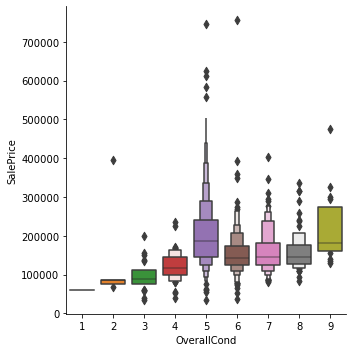

In [36]:
plt.figure(figsize=[8,6])
sns.catplot(x='OverallCond', y='SalePrice', data = df.sort_values('SalePrice', ascending=False), kind = 'boxen')

plt.show()

We can see that the price of the house is highest for the house which got 9 ratings (Excellent)

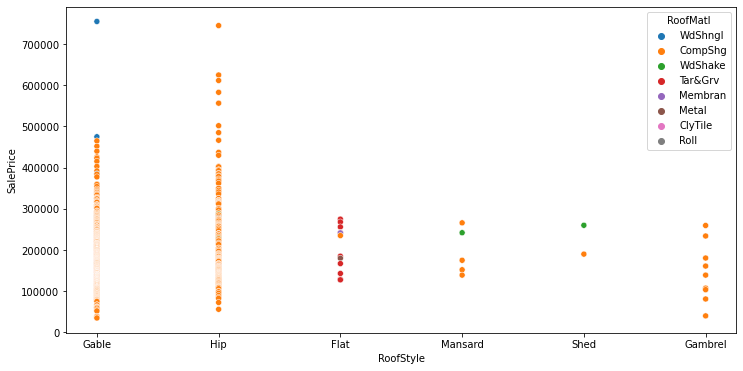

In [37]:
plt.figure(figsize=[12,6])
sns.scatterplot(x='RoofStyle', y='SalePrice', hue = 'RoofMatl', data = df.sort_values('SalePrice', ascending=False))

plt.show()

We can see that the most of the roof are made up of Standard (Composite) Shingle.

The highest price of the house having Gable roof type and the material of the roof is Wood Shingles.

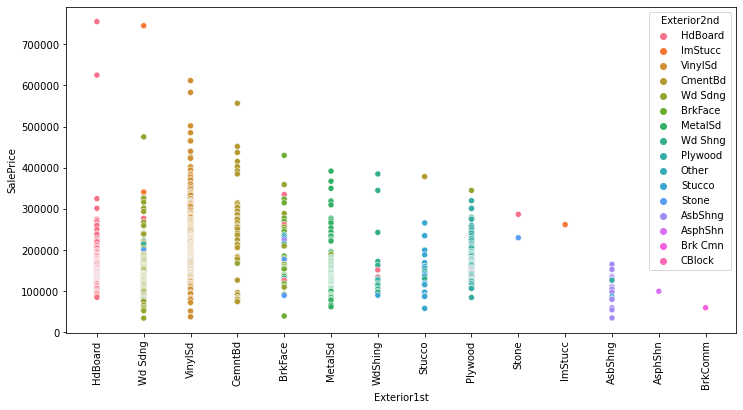

In [38]:
plt.figure(figsize=[12,6])
sns.scatterplot(x='Exterior1st', y='SalePrice', hue = 'Exterior2nd', data = df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

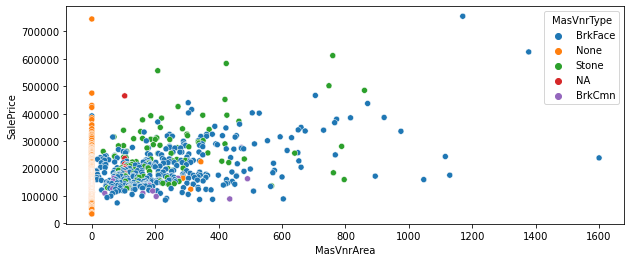

In [39]:
plt.figure(figsize=[10,4])
sns.scatterplot(x='MasVnrArea', y='SalePrice', hue = 'MasVnrType', data = df.sort_values('SalePrice', ascending=False));

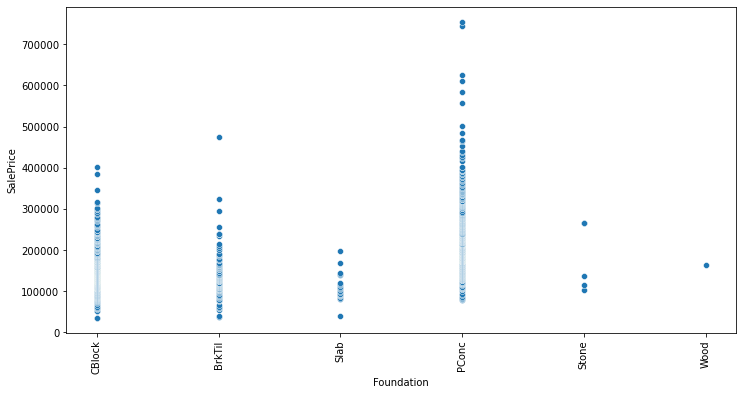

In [40]:
plt.figure(figsize=[12,6])
sns.scatterplot(x='Foundation', y = 'SalePrice', data=df.sort_values('SalePrice'))
plt.xticks(rotation=90)
plt.show()

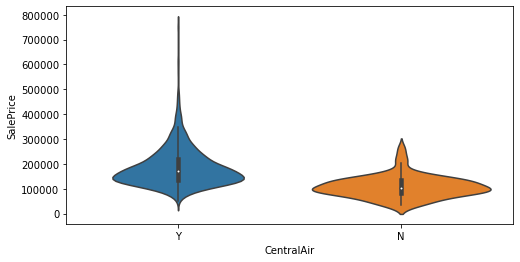

In [41]:
plt.figure(figsize=[8,4])
sns.violinplot(x='CentralAir', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

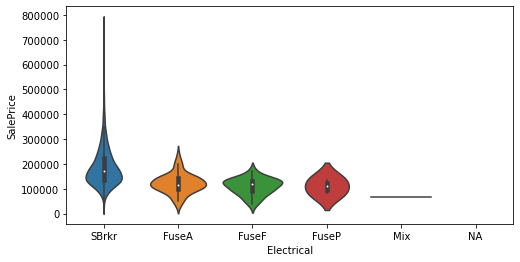

In [42]:
plt.figure(figsize=[8,4])
sns.violinplot(x='Electrical', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

### LabelEncoder

In [43]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

cat_colu = ('MSZoning', 'Street','LotShape', 'LandContour','LotConfig', 
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 
    'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 
    'FireplaceQu', 'GarageType','GarageYrBlt', 'GarageFinish', 
    'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
    'MiscFeature','SaleType', 'SaleCondition', 'Source')

for i in cat_colu:
    LE.fit(list(df[i].values))
    LE.classes_
    df[i] = LE.transform(list(df[i].values))

In [44]:
df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0      127         120         3    70.049958     4928       1         0   
1      889          20         3    95.000000    15865       1         0   
2      793          60         3    92.000000     9920       1         0   
3      110          20         3   105.000000    11751       1         0   
4      422          20         3    70.049958    16635       1         0   
...    ...         ...       ...          ...      ...     ...       ...   
1455    83          20         3    78.000000    10206       1         3   
1456  1048          20         3    57.000000     9245       1         1   
1457    17          20         3    70.049958    11241       1         0   
1458   523          50         4    50.000000     5000       1         3   
1459  1379         160         4    21.000000     1953       1         3   

      LandContour  LotConfig  LandSlope  ...  PoolQC  Fence  MiscFeature  \
0               3          4          0  ...       3      4            1   
1               3          4          1  ...       3      4            1   
2               3          1          0  ...       3      4            1   
3               3          4          0  ...       3      2            1   
4               3          2          0  ...       3      4            1   
...           ...        ...        ...  ...     ...    ...          ...   
1455            3          4          0  ...       3      4            1   
1456            3          4          0  ...       3      4            1   
1457            3          1          0  ...       3      4            3   
1458            3          0          0  ...       3      4            1   
1459            3          4          0  ...       3      4            1   

      MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  Source  
0           0       2    2007         8              4   128000.0       1  
1           0      10    2007         8              4   268000.0       1  
2           0       6    2007         8              4   269790.0       1  
3           0       1    2010         0              4   190000.0       1  
4           0       6    2009         8              4   215000.0       1  
...       ...     ...     ...       ...            ...        ...     ...  
1455        0      10    2008         8              4        NaN       0  
1456        0       2    2008         8              4        NaN       0  
1457      700       3    2010         8              4        NaN       0  
1458        0      10    2006         8              4        NaN       0  
1459        0       6    2006         8              4        NaN       0  

[1460 rows x 80 columns]

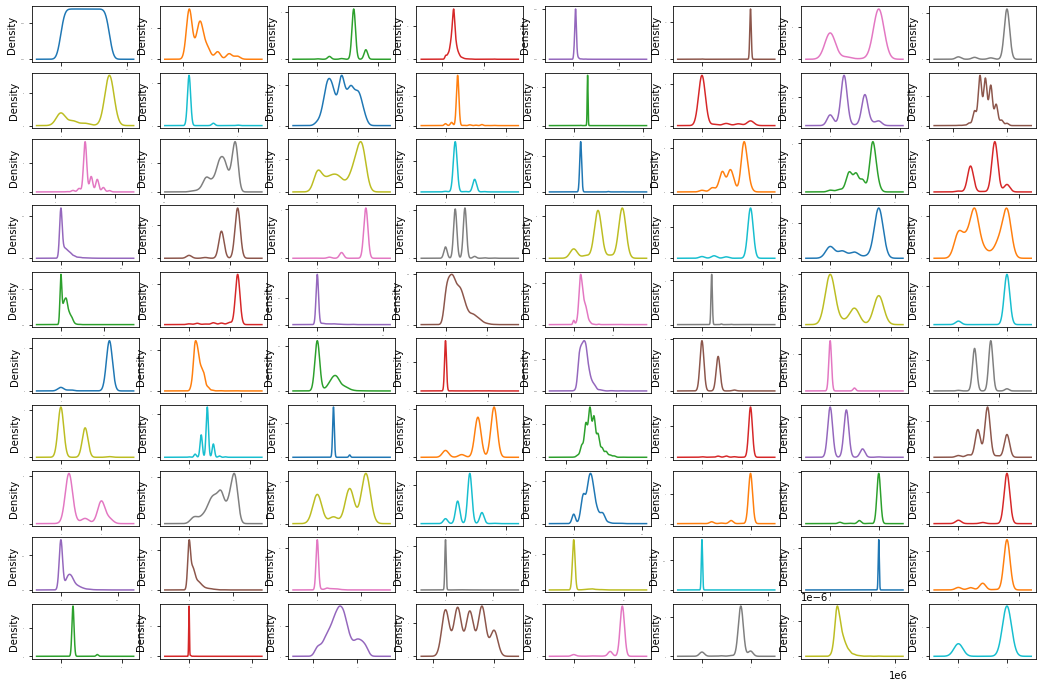

In [45]:
df.plot(kind='density', subplots=True, layout=(10,8), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

## Statistical

In [46]:
df.describe()

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean    730.500000    56.897260     3.028767    70.049958   10516.828082   
std     421.610009    42.300571     0.632017    22.024023    9981.264932   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     365.750000    20.000000     3.000000    60.000000    7553.500000   
50%     730.500000    50.000000     3.000000    70.049958    9478.500000   
75%    1095.250000    70.000000     3.000000    79.000000   11601.500000   
max    1460.000000   190.000000     4.000000   313.000000  215245.000000   

            Street     LotShape  LandContour    LotConfig    LandSlope  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.995890     1.942466     2.777397     3.019178     0.062329  ...   
std       0.063996     1.409156     0.707666     1.622634     0.276232  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000     3.000000     2.000000     0.000000  ...   
50%       1.000000     3.000000     3.000000     4.000000     0.000000  ...   
75%       1.000000     3.000000     3.000000     4.000000     0.000000  ...   
max       1.000000     3.000000     3.000000     4.000000     2.000000  ...   

            PoolQC        Fence  MiscFeature       MiscVal       MoSold  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      2.991096     3.504795     1.069178     43.489041     6.321918   
std       0.140703     1.082912     0.372102    496.123024     2.703626   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       3.000000     4.000000     1.000000      0.000000     5.000000   
50%       3.000000     4.000000     1.000000      0.000000     6.000000   
75%       3.000000     4.000000     1.000000      0.000000     8.000000   
max       3.000000     4.000000     4.000000  15500.000000    12.000000   

            YrSold     SaleType  SaleCondition      SalePrice       Source  
count  1460.000000  1460.000000    1460.000000    1168.000000  1460.000000  
mean   2007.815753     7.513014       3.770548  181477.005993     0.800000  
std       1.328095     1.552100       1.100854   79105.586863     0.400137  
min    2006.000000     0.000000       0.000000   34900.000000     0.000000  
25%    2007.000000     8.000000       4.000000  130375.000000     1.000000  
50%    2008.000000     8.000000       4.000000  163995.000000     1.000000  
75%    2009.000000     8.000000       4.000000  215000.000000     1.000000  
max    2010.000000     8.000000       5.000000  755000.000000     1.000000  

[8 rows x 80 columns]

## Checking the Co-relation

In [47]:
df.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096    -0.009601 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.357056 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.106363 -0.034452   
LotFrontage   -0.009601   -0.357056 -0.106363     1.000000  0.306795   
LotArea       -0.033226   -0.139781 -0.034452     0.306795  1.000000   
...                 ...         ...       ...          ...       ...   
YrSold         0.000712   -0.021407 -0.020628     0.006768 -0.014261   
SaleType       0.019773    0.012464  0.097437    -0.030846  0.012292   
SaleCondition -0.005806   -0.024940  0.009494     0.058464  0.034169   
SalePrice     -0.023897   -0.060775 -0.133221     0.323850  0.249499   
Source        -0.030199   -0.006115 -0.047700     0.069635 -0.006430   

                 Street  LotShape  LandContour  LotConfig  LandSlope  ...  \
Id             0.008916  0.032122    -0.019659   0.049756   0.005847  ...   
MSSubClass    -0.024969  0.119289    -0.002940   0.075910  -0.025672  ...   
MSZoning       0.087654  0.061887    -0.017854  -0.009895  -0.022055  ...   
LotFrontage   -0.037323 -0.144931    -0.075647  -0.181253   0.067608  ...   
LotArea       -0.197131 -0.165315    -0.149083  -0.121161   0.436868  ...   
...                 ...       ...          ...        ...        ...  ...   
YrSold        -0.025043  0.036449     0.020507  -0.005992  -0.002305  ...   
SaleType       0.014339 -0.000911    -0.025754   0.014325   0.054858  ...   
SaleCondition  0.006064 -0.038118     0.033809   0.051579  -0.043095  ...   
SalePrice      0.044753 -0.248171     0.032836  -0.060452   0.015485  ...   
Source         0.021413 -0.005835    -0.009682  -0.018368   0.013642  ...   

                 PoolQC     Fence  MiscFeature   MiscVal    MoSold    YrSold  \
Id            -0.033928 -0.000399    -0.038103 -0.006242  0.021172  0.000712   
MSSubClass    -0.005221  0.086360    -0.046881 -0.007683 -0.013585 -0.021407   
MSZoning       0.002882 -0.061289    -0.005553  0.009293 -0.031496 -0.020628   
LotFrontage   -0.191630 -0.036751     0.009213  0.001168  0.010158  0.006768   
LotArea       -0.065167  0.036031     0.106135  0.038068  0.001205 -0.014261   
...                 ...       ...          ...       ...       ...       ...   
YrSold         0.060904 -0.035366     0.057708  0.004906 -0.145721  1.000000   
SaleType      -0.013592 -0.006154    -0.003340  0.015773 -0.047386 -0.002327   
SaleCondition  0.097425  0.100675    -0.008074  0.013027  0.013320  0.003880   
SalePrice     -0.141136  0.143922    -0.063477 -0.013071  0.072764 -0.045508   
Source        -0.031652 -0.054729     0.005524  0.015429  0.016473 -0.016509   

               SaleType  SaleCondition  SalePrice    Source  
Id             0.019773      -0.005806  -0.023897 -0.030199  
MSSubClass     0.012464      -0.024940  -0.060775 -0.006115  
MSZoning       0.097437       0.009494  -0.133221 -0.047700  
LotFrontage   -0.030846       0.058464   0.323850  0.069635  
LotArea        0.012292       0.034169   0.249499 -0.006430  
...                 ...            ...        ...       ...  
YrSold        -0.002327       0.003880  -0.045508 -0.016509  
SaleType       1.000000       0.184067  -0.050851 -0.060919  
SaleCondition  0.184067       1.000000   0.217687 -0.003112  
SalePrice     -0.050851       0.217687   1.000000       NaN  
Source        -0.060919      -0.003112        NaN  1.000000  

[80 rows x 80 columns]

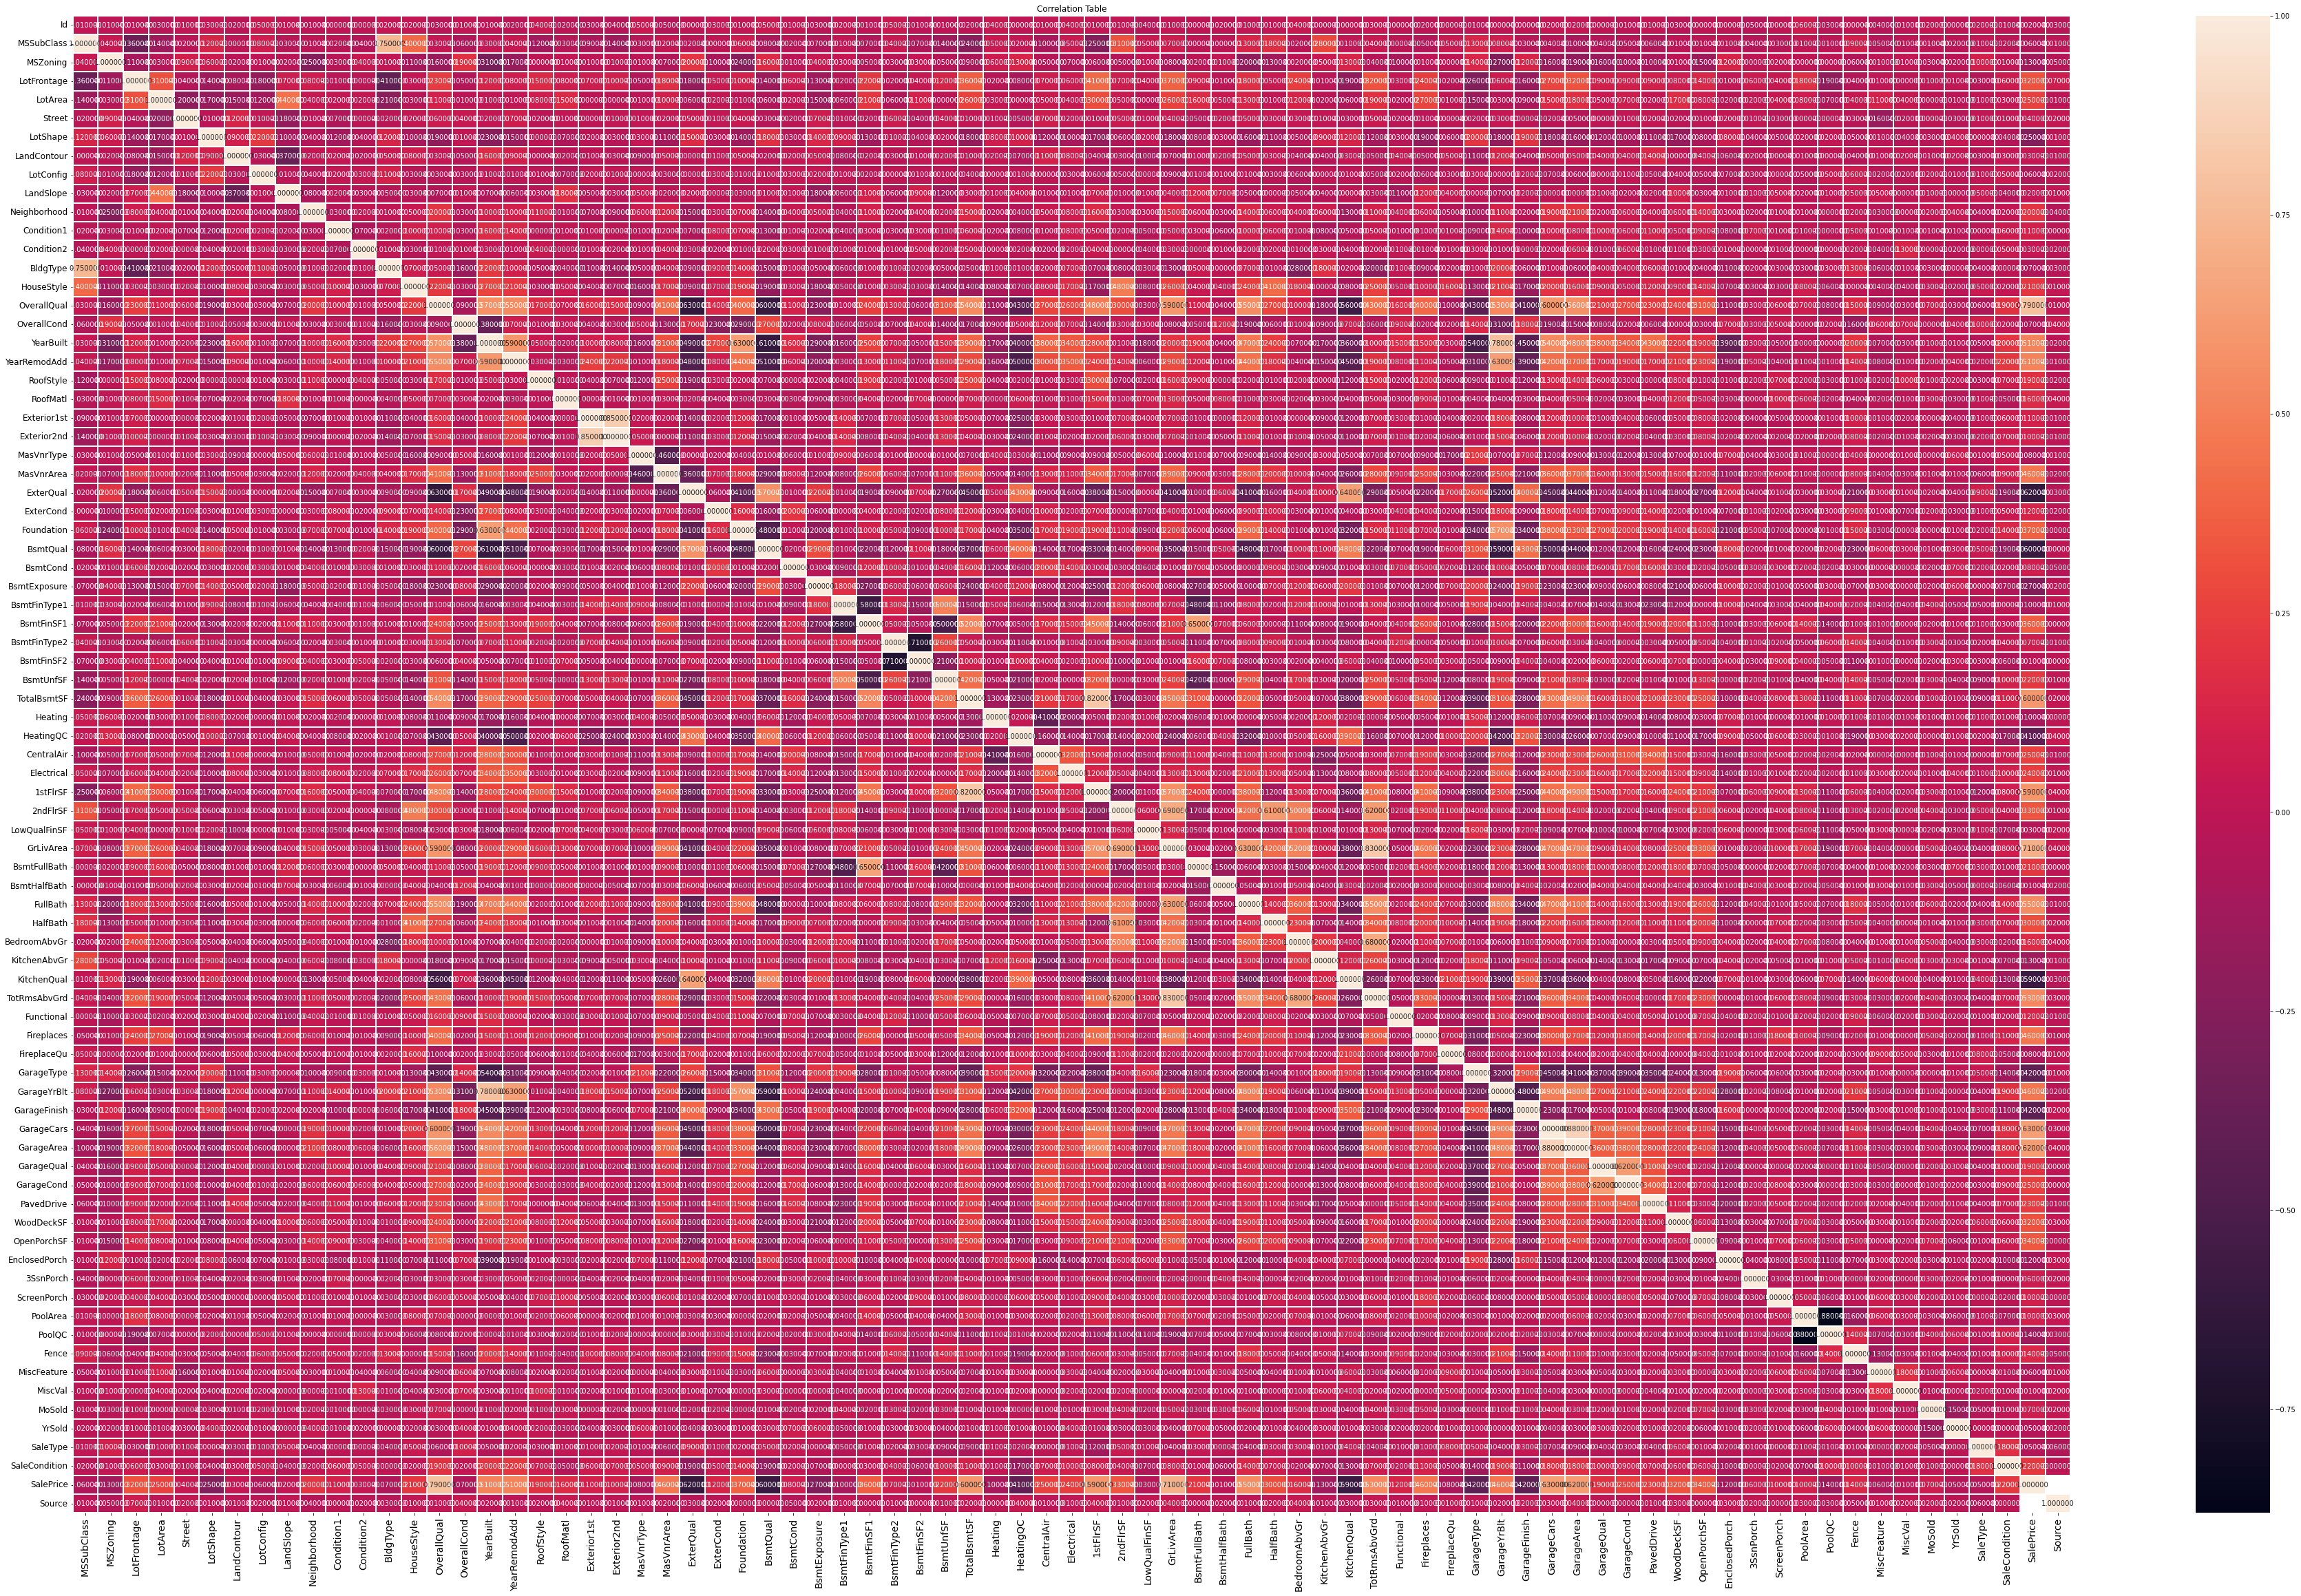

In [48]:
plt.figure(figsize=[65,40])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot= True, linewidths=0.45, linecolor='white', fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Correlation Table')
plt.show()

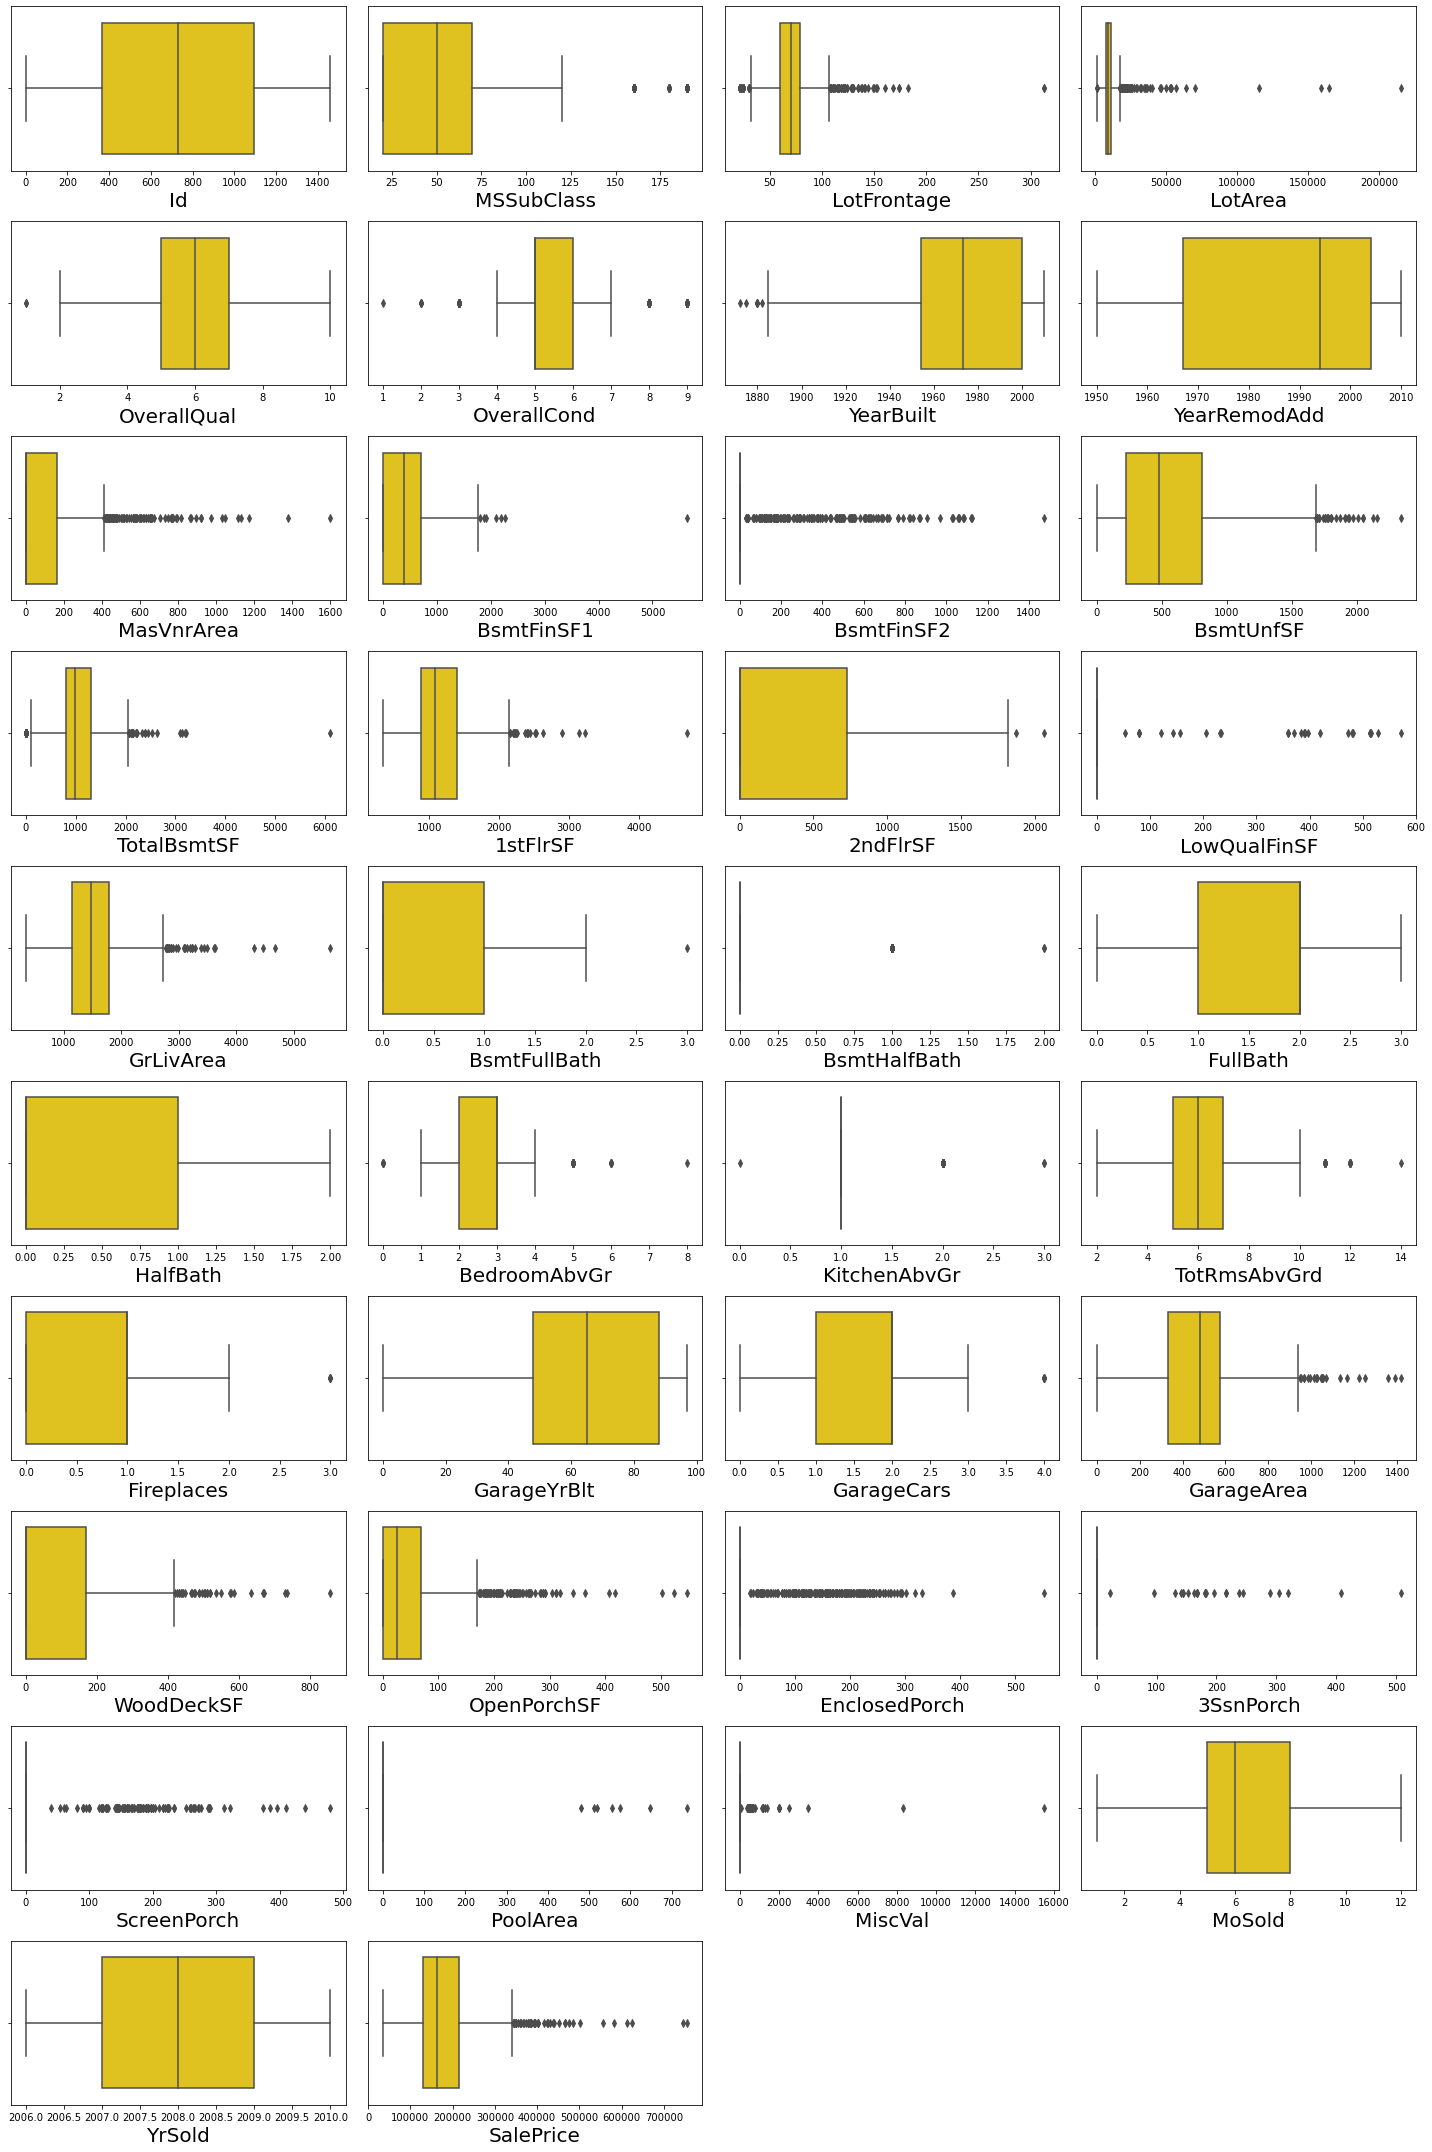

In [49]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in num_col:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [50]:
train_data = df[:1168]

train_data = train_data.drop(['Source'],axis = 1)

train_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3    70.049958     4928       1         0   
1  889          20         3    95.000000    15865       1         0   
2  793          60         3    92.000000     9920       1         0   
3  110          20         3   105.000000    11751       1         0   
4  422          20         3    70.049958    16635       1         0   

   LandContour  LotConfig  LandSlope  ...  PoolArea  PoolQC  Fence  \
0            3          4          0  ...         0       3      4   
1            3          4          1  ...         0       3      4   
2            3          1          0  ...         0       3      4   
3            3          4          0  ...         0       3      2   
4            3          2          0  ...         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1        0       2    2007         8              4   128000.0  
1            1        0      10    2007         8              4   268000.0  
2            1        0       6    2007         8              4   269790.0  
3            1        0       1    2010         0              4   190000.0  
4            1        0       6    2009         8              4   215000.0  

[5 rows x 79 columns]

In [51]:
test_data = df[1168:]
test_data = test_data.drop(['Source','SalePrice'],axis=1)

test_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1168   337          20         3    86.000000    14157       1         0   
1169  1018         120         3    70.049958     5814       1         0   
1170   929          20         3    70.049958    11838       1         3   
1171  1148          70         3    75.000000    12000       1         3   
1172  1227          60         3    86.000000    14598       1         0   

      LandContour  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  PoolQC  \
1168            1          0          0  ...            0         0       3   
1169            3          1          0  ...            0         0       3   
1170            3          4          0  ...            0         0       3   
1171            0          4          0  ...            0         0       3   
1172            3          1          0  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
1168      4            1        0       7    2007         8              4  
1169      4            1        0       8    2009         0              0  
1170      4            1        0       6    2009         8              4  
1171      4            1        0       7    2009         8              4  
1172      4            1        0       1    2008         8              4  

[5 rows x 78 columns]

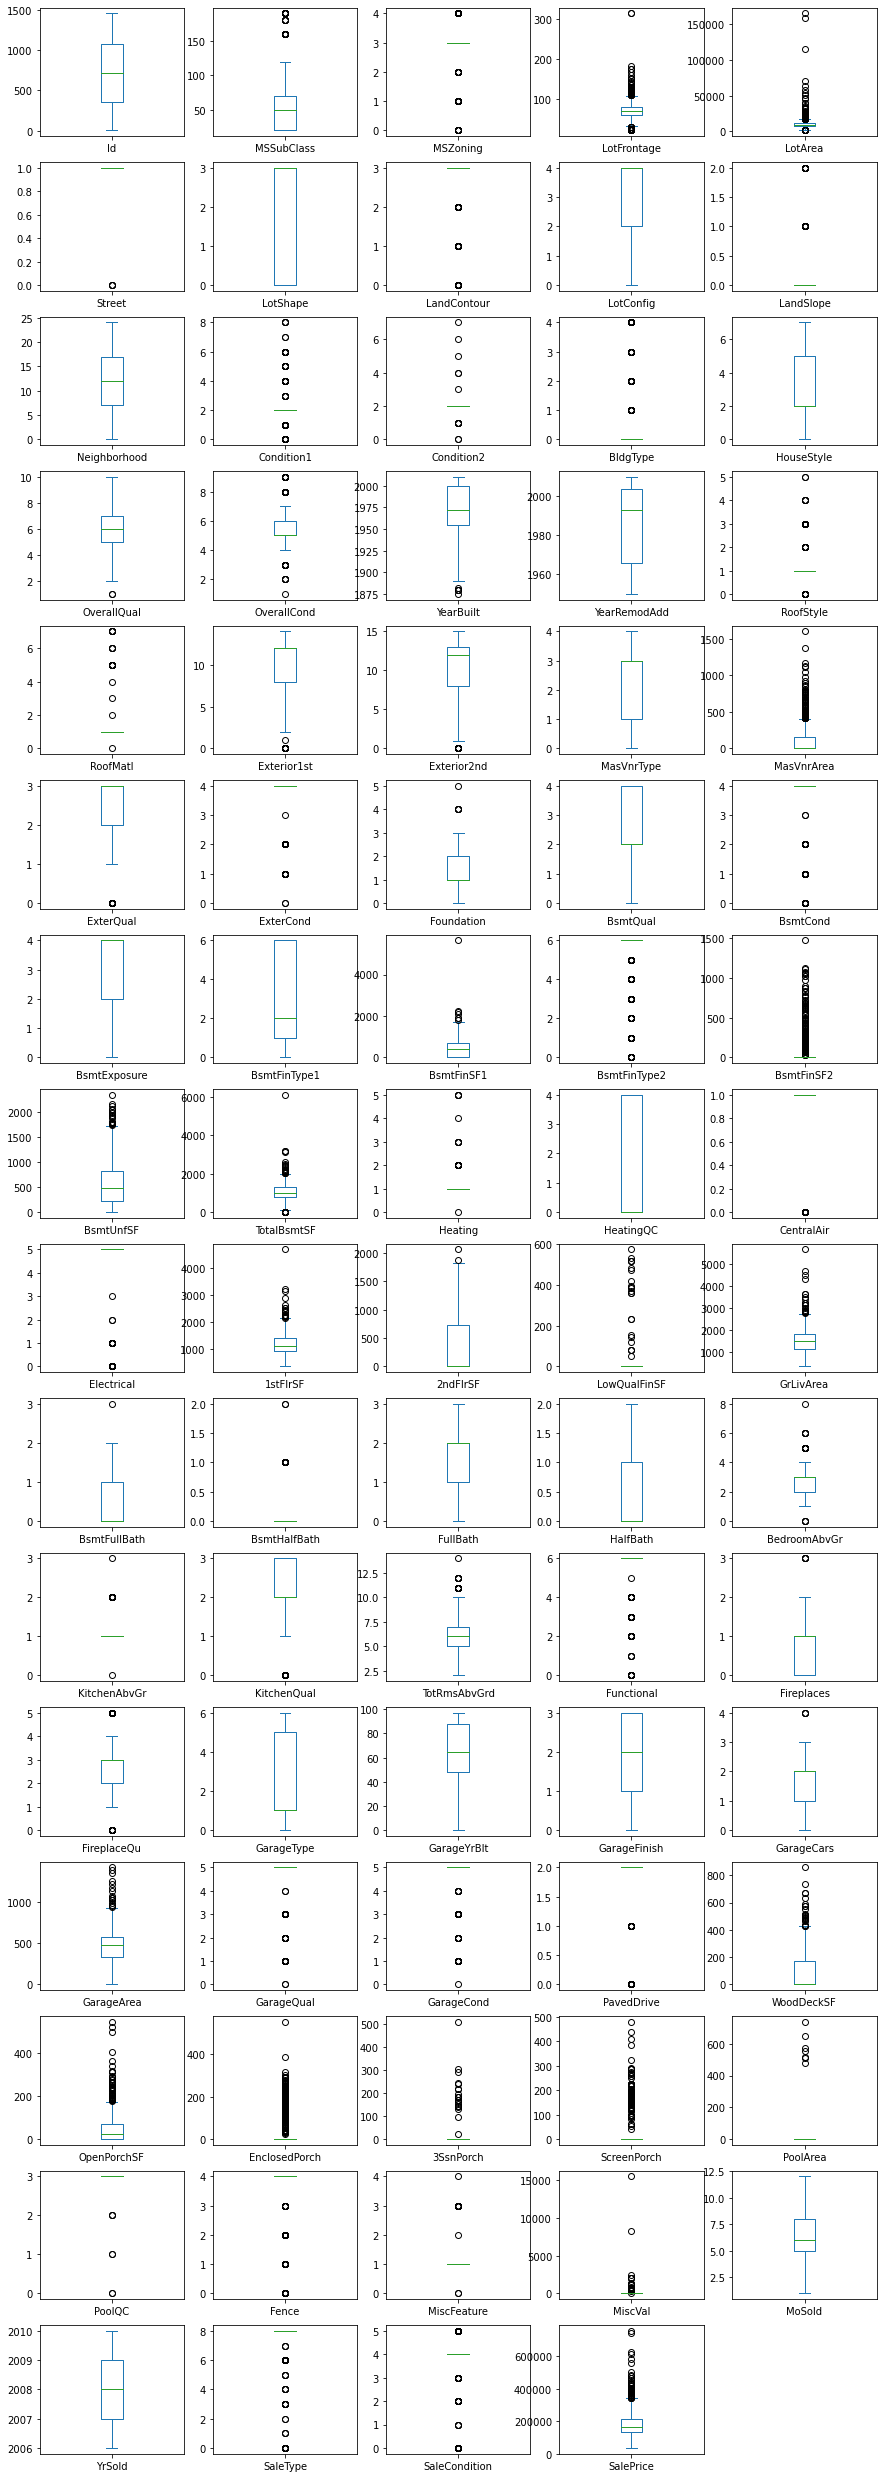

In [52]:
train_data.plot(kind='box', subplots=True, layout=(16,5), sharex=False, legend=True, figsize=(15,45))
plt.show()

## Data Cleaning
### Removing Outliers using zscore method

In [53]:
from scipy.stats import zscore

z = np.abs(zscore(train_data))
z.shape

(1168, 79)

In [54]:
print(np.where (z>6))

(array([   1,   20,   22,   32,   32,   33,   51,   51,   63,   66,   95,
         98,  103,  103,  103,  113,  113,  119,  119,  141,  141,  141,
        142,  206,  211,  211,  214,  214,  226,  228,  253,  255,  272,
        279,  310,  310,  310,  320,  333,  356,  361,  363,  370,  396,
        418,  429,  441,  441,  443,  463,  478,  481,  488,  493,  500,
        500,  507,  510,  532,  534,  544,  553,  562,  563,  572,  572,
        572,  572,  591,  592,  592,  592,  592,  592,  592,  592,  614,
        614,  637,  639,  652,  686,  689,  689,  691,  691,  699,  713,
        716,  721,  722,  759,  769,  794,  821,  824,  833,  833,  834,
        839,  846,  888,  897,  899,  911,  920,  920,  935,  944,  952,
        952,  956,  961, 1008, 1023, 1038, 1038, 1046, 1047, 1053, 1053,
       1080, 1082, 1094, 1098, 1108, 1120, 1120, 1120, 1120, 1123, 1123,
       1123, 1139, 1142], dtype=int64), array([20, 67, 34, 12, 73, 43, 65, 68, 67, 43, 34, 67, 20, 43, 68,  4,  9,
       2

In [55]:
train_new = train_data[(z<6).all(axis=1)]
print(train_data.shape)
print(train_new.shape)

print ('Shape after removing the outliers is ', train_new.shape)

(1168, 79)
(1069, 79)
Shape after removing the outliers is  (1069, 79)


In [56]:
loss_per = ((1168-1069)/1168)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  8.476027397260275


In [57]:
X = train_data.drop('SalePrice',axis=1)
Y = train_data['SalePrice']

### Skewness

In [58]:
X.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.732333
LotArea          10.659285
                   ...    
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
Length: 78, dtype: float64

In [59]:
from sklearn.preprocessing import power_transform

X = power_transform(X)
X

array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.89957552,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14807039,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

## Model

### Finding best Random state

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=i)
    RF = RandomForestRegressor()
    RF.fit(X_train,Y_train)
    predRF = RF.predict(X_test)
    acc = r2_score(Y_test,predRF)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print(f'Best Accuracy is {maxAccu} on Random_state {maxRs}')

Best Accuracy is 0.9059252742410071 on Random_state 135


### Train_Test_Split

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRs)

### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
LR=LinearRegression()
LR.fit(X_train,Y_train)
# [Prediction]
predLR = LR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLR)))

R2 Score: 0.8518295964645597
Mean Absolute Error 21999.48863264863
Mean Squared Error 1050575342.9819363
Root Mean Squared Error 32412.580011192204


### Linear Regression with Ridge

In [64]:
from sklearn.model_selection import GridSearchCV
paramsRidge ={'alpha':[0.01,0.1,1.0,10.26],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'saga'}


In [65]:
ridge = Ridge(alpha = 10.26,solver = 'sag')
ridge.fit(X_train,Y_train)
ridge.score(X_train,Y_train)
pred_ridge = ridge.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_ridge))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_ridge))
print('Mean Squared Error',mean_squared_error(Y_test,pred_ridge))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_ridge)))

R2 Score: 0.8522870533444359
Mean Absolute Error 21911.126083083116
Mean Squared Error 1047331828.035576
Root Mean Squared Error 32362.50651657835


### Linear Regression With Lasso

In [66]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [67]:
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(X_train,Y_train)
lasso.score(X_train,Y_train)
pred_lasso = lasso.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_lasso))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(Y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_lasso)))

R2 Score: 0.8518526431031485
Mean Absolute Error 21993.179267663494
Mean Squared Error 1050411934.9755981
Root Mean Squared Error 32410.059163407866


### Random Forest Regressor

In [68]:
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)
# [Prediction]
predRFR = RFR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFR)))

R2 Score: 0.9078739298276896
Mean Absolute Error 17001.49809116809
Mean Squared Error 653203173.2349517
Root Mean Squared Error 25557.839760726096


### GradientBoostingRegressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)

# [Prediction]
predGB = GB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGB)))

R2 Score: 0.9176900838878058
Mean Absolute Error 16541.442314400367
Mean Squared Error 583603515.1898583
Root Mean Squared Error 24157.88722529059


### Bagging Regressor

In [71]:
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor()
BR.fit(X_train,Y_train)

# [Prediction]
predBR = BR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predBR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predBR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predBR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predBR)))

R2 Score: 0.8846018369124353
Mean Absolute Error 19940.60740740741
Mean Squared Error 818209722.5388604
Root Mean Squared Error 28604.365445485073


### Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

# [Prediction]
predDTR = DTR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTR)))

R2 Score: 0.7338663869154982
Mean Absolute Error 29196.957264957266
Mean Squared Error 1886972061.7207978
Root Mean Squared Error 43439.29168069845


### ExtraTrees Regressor

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X_train,Y_train)

# [Prediction]
predETR = ETR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETR)))

R2 Score: 0.9135470901508305
Mean Absolute Error 16980.459686609687
Mean Squared Error 612978660.0389029
Root Mean Squared Error 24758.40584607383


### XGB Regressor

In [75]:
from xgboost import XGBRegressor as xgb

xgb=xgb(verbosity=0)
xgb.fit(X_train,Y_train)

# prediction
predxgb=xgb.predict(X_test)
print('R2_Score:',r2_score(Y_test,predxgb))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test, predxgb))

# Mean Squared Error(MSE)
print('Mean Squared Error(MAE)',mean_squared_error(Y_test, predxgb))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE)",np.sqrt(mean_squared_error(Y_test, predxgb)))

R2_Score: 0.9044226880526204
Mean Absolute Error(MAE) 18277.59948139245
Mean Squared Error(MAE) 677673576.3994386
Root Mean Squared Error (RMSE) 26032.164266526874


### KNeighborsRegressor

In [76]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))

R2 Score: 0.7687971522598616
Mean Absolute Error 25668.372649572648
Mean Squared Error 1639301812.422336
Root Mean Squared Error 40488.292288294106


### Cross-Validation

In [77]:
from sklearn.model_selection import cross_val_score

# Checking cv score for Linear Regression
print('Linear Regression -->',cross_val_score(LR,X,Y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print('Random Forest Regressor -->',cross_val_score(RFR,X,Y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print('GradientBoostingRegressor -->',cross_val_score(GB,X,Y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print('BaggingRegressor -->',cross_val_score(BR,X,Y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree Regressor -->',cross_val_score(DTR,X,Y,cv=5).mean())

# Checking cv score for ExtraTrees Regressor
print('ExtraTrees Regressor -->',cross_val_score(ETR,X,Y,cv=5).mean())

# Checking cv score for XGBRegressor
print('XGBRegressor:',cross_val_score(xgb,X,Y,cv=5).mean())

Linear Regression --> 0.7477740469181466
Random Forest Regressor --> 0.8429723354140986
GradientBoostingRegressor --> 0.8716647333256681
BaggingRegressor --> 0.8093885423616174
Decision Tree Regressor --> 0.6630017748535868
ExtraTrees Regressor --> 0.828600039978809
XGBRegressor: 0.8220809584210146


### Model Save

In [83]:
import joblib
joblib.dump(RFR,"Housing_Price_Prediction.pkl")

['Housing_Price_Prediction.pkl']

In [85]:
a = np.array(Y_test)
predicted = np.array(RFR.predict(X_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

Original  Predicted
0    120000.0  128482.75
1    140000.0  151412.66
2    172500.0  169715.50
3    244600.0  251475.53
4     88000.0   94261.21
..        ...        ...
346  171000.0  149937.62
347  137500.0  143753.22
348  194500.0  190640.11
349  283463.0  275978.66
350  150000.0  140885.39

[351 rows x 2 columns]